In [1]:
import numpy as np
import pandas as pd

In [2]:
DATASET_PATH = './train.csv'
PREPARED_DATASET_PATH = './train_prepared.csv'

In [3]:
df = pd.read_csv(DATASET_PATH, sep=',')

# Уменьшение объема памяти датасета

In [4]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col]. astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                       
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                       df[col] = df[col].astype(np.float32)
                else:
                       df[col] = df[col].astype(np.float64)

    
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:1f}%'.format(100 * (start_mem - end_mem) / start_mem))
                       
    return df

In [5]:
reduce_mem_usage(df)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.69 MB
Decreased by 54.995600%


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027313,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.875000
1,3013,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875
2,8215,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750
3,2352,1,1.0,40.409908,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.000000
4,13866,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090729,33.272625,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.453125
9996,16265,27,2.0,64.307686,37.038422,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.156250
9997,2795,178,1.0,29.648056,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.906250
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.406250


In [6]:
#df['LifeSquare'].fillna((0.61 * df['Square']), inplace=True)
#df.info()

In [57]:
df['Square'].median() / df['LifeSquare'].median()

1.6019307

In [58]:
df['LifeSquare'] * 1.6

0             NaN
1       37.070755
2       76.275154
3             NaN
4       61.700024
          ...    
9995    53.236202
9996    59.261475
9997    26.488581
9998    35.722992
9999    35.682186
Name: LifeSquare, Length: 10000, dtype: float32

# Визуализация данных

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [9]:
matplotlib.rcParams.update({'font.size': 14}) # размер шрифта на всех графиках

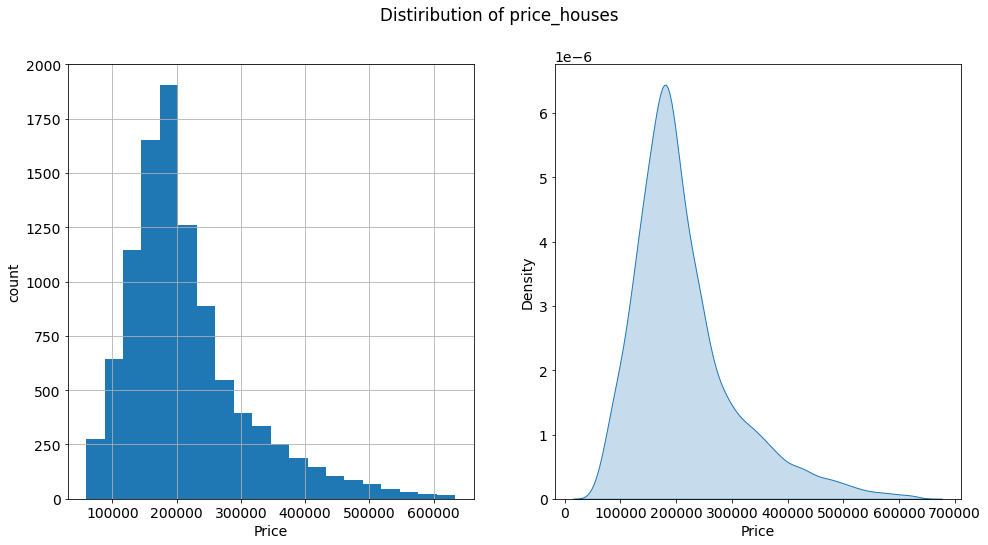

In [10]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist(density=False, bins=20)
plt.xlabel('Price')
plt.ylabel('count')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distiribution of price_houses')
plt.show()

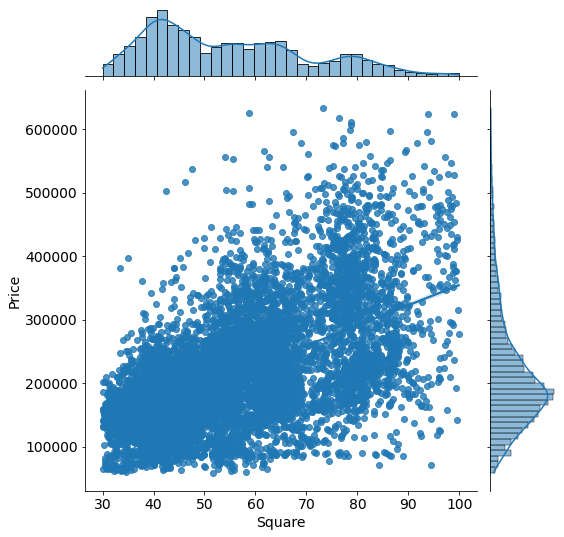

In [11]:

grid = sns.jointplot(df.loc[(df['Square'] < 100) & (df['Square'] > 30), 'Square'], df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

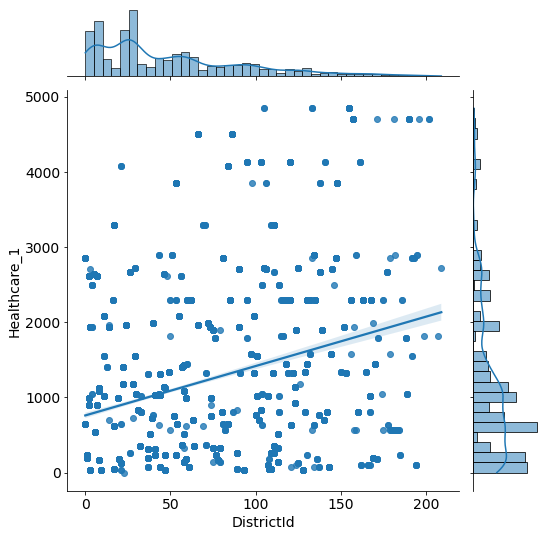

In [12]:
grid = sns.jointplot(df['DistrictId'], df['Healthcare_1'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [48]:
districts_healthcare = df.groupby(['DistrictId']).agg({'Healthcare_1':'median'}).to_dict()
districts_healthcare

{'Healthcare_1': {0: 2857.0,
  1: 228.7719268798828,
  2: 990.0,
  3: 30.0,
  4: 2500.0,
  5: 2643.0,
  6: 540.0,
  7: 900.0,
  8: 1084.0,
  9: 30.0,
  10: nan,
  11: 1298.61669921875,
  12: nan,
  13: 1406.0,
  14: 1940.0,
  15: nan,
  16: 2300.0,
  17: 620.0,
  18: nan,
  19: 990.0,
  20: 176.0,
  21: 125.0,
  22: 1183.0,
  23: 0.0,
  24: 1970.0,
  25: nan,
  26: 2672.0,
  27: nan,
  28: 1183.0,
  29: 1783.4000244140625,
  30: 1046.0,
  31: 830.0,
  32: 350.0,
  33: 848.888916015625,
  34: nan,
  35: nan,
  36: nan,
  37: 256.0,
  38: 520.0,
  39: 730.0,
  40: 1994.0,
  41: 580.875,
  42: nan,
  43: 1046.0,
  44: 1036.0,
  45: nan,
  46: 1308.84375,
  47: 279.8775634765625,
  48: 2620.0,
  49: 1340.0,
  50: 2058.0,
  51: 2890.0,
  52: 750.0,
  53: 229.0,
  54: 645.0,
  55: 2078.0,
  56: 2620.0,
  57: 1406.0,
  58: 1084.0,
  59: 176.0,
  60: 2300.0,
  61: 80.0,
  62: 2300.0,
  63: 705.0,
  64: 350.0,
  65: nan,
  66: 1970.0,
  67: nan,
  68: nan,
  69: 2764.0,
  70: 3300.0,
  71: 370.

In [49]:
# Healthcare
# Fillna with dictrict healthcare value. (If district has no healthcare value fill with medians)      
df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = df['DistrictId'].map(districts_healthcare)
# df['Healthcare_1'].fillna(medians.Healthcare_1, inplace=True)       
# # Clip on upper quantille
q_max = np.quantile(df['Healthcare_1'], q=0.9)
df['Healthcare_1'].clip(upper=q_max, axis=0, inplace=True)

In [50]:
df['Healthcare_1']

0              NaN
1           1183.0
2            240.0
3       228.771927
4              NaN
           ...    
9995          80.0
9996           NaN
9997         628.0
9998         125.0
9999           NaN
Name: Healthcare_1, Length: 10000, dtype: object

### Анализ признаков

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [32]:
from sklearn.decomposition import PCA

In [33]:
scaler = RobustScaler()
pca = PCA(n_components=1, random_state=42)
social_scaled = pd.DataFrame(scaler.fit_transform(df[['Social_1', 'Social_2', 'Social_3']]))
df['Social'] = pca.fit_transform(social_scaled)

In [36]:
df.sample(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Social
252,16587,80,1.0,31.799055,16.106514,8.0,18,22.0,1990,0.000000,...,B,39,8647,0,810.00000,0,5,B,155767.031250,-1.599717
8263,12948,67,1.0,41.779591,23.023157,8.0,13,17.0,1986,0.007720,...,B,38,4788,2,NaN,0,4,B,175191.281250,-1.207475
2450,6788,73,1.0,44.243137,42.645580,1.0,6,23.0,2017,0.042032,...,B,37,6856,84,1940.00000,2,5,B,362271.031250,15.195398
8928,2536,13,2.0,54.509392,34.357174,9.0,12,17.0,2002,0.090799,...,B,74,19083,2,1406.00000,5,15,B,235975.234375,-1.175444
6326,15329,79,1.0,41.623158,20.059994,8.0,16,14.0,1971,0.307467,...,A,30,5048,9,325.00000,2,5,B,214358.609375,0.192104
4004,4435,30,2.0,65.665169,NaN,1.0,8,17.0,1977,0.000078,...,B,22,6398,141,1046.00000,3,23,B,182824.312500,26.592147
2355,14042,27,2.0,57.791615,NaN,1.0,9,17.0,1977,0.011654,...,B,4,915,0,NaN,0,0,B,139531.578125,-1.618673
7589,7457,27,1.0,42.100079,NaN,1.0,11,17.0,1977,0.011654,...,B,4,915,0,NaN,0,0,B,114012.101562,-1.618673
5428,11719,124,2.0,58.505348,31.428492,7.0,9,10.0,1958,0.169091,...,B,19,3856,10,1812.45459,2,5,B,325854.250000,0.388579
2264,3657,57,2.0,60.201046,32.266647,10.0,8,18.0,2004,0.133215,...,B,49,11395,3,1406.00000,3,4,A,230531.046875,-0.993276


In [9]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('Price', axis=1, inplace=True)

In [10]:
df_num_features.head()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Healthcare_1
0,3.0,115.027313,NaN,10.0,10.0,0.075424,NaN
1,1.0,39.832523,23.169222,8.0,8.0,0.118537,1183.0
2,3.0,78.342216,47.671970,10.0,17.0,0.025609,240.0
3,1.0,40.409908,NaN,1.0,22.0,0.007122,NaN
4,2.0,64.285065,38.562515,9.0,16.0,0.282798,NaN


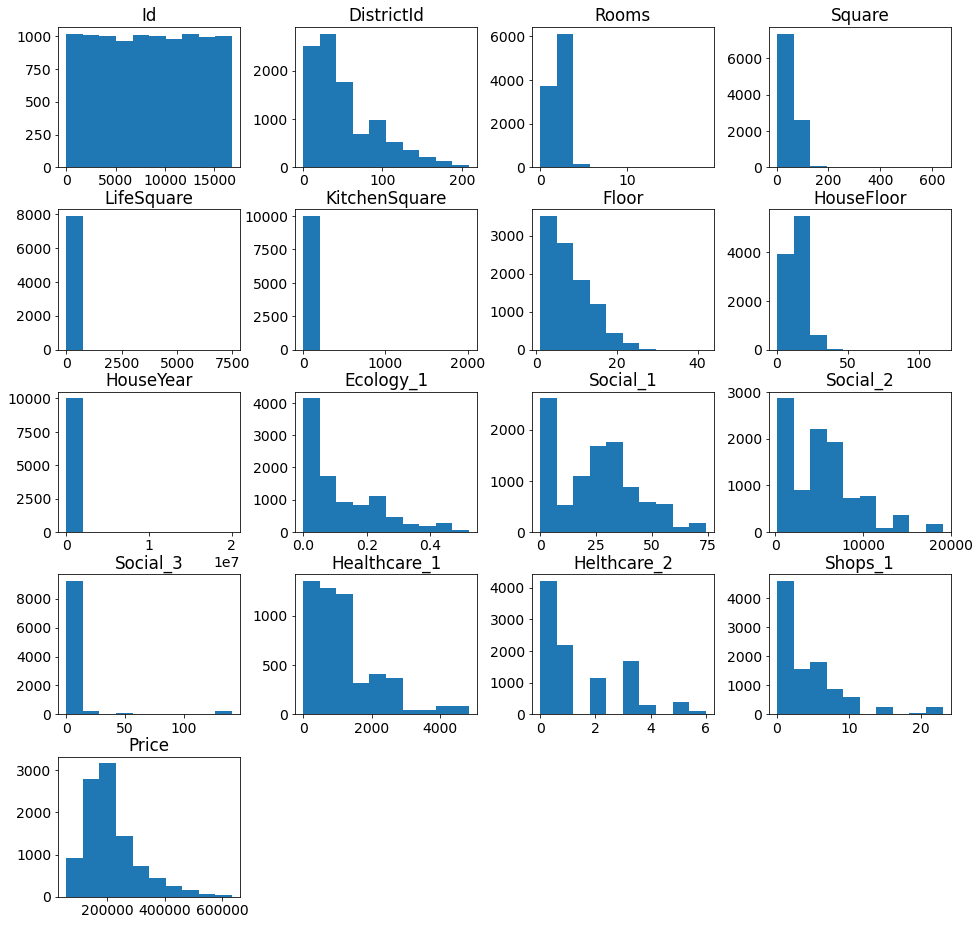

In [11]:
df.hist(figsize=(16, 16), bins=10, grid=False)
plt.show()

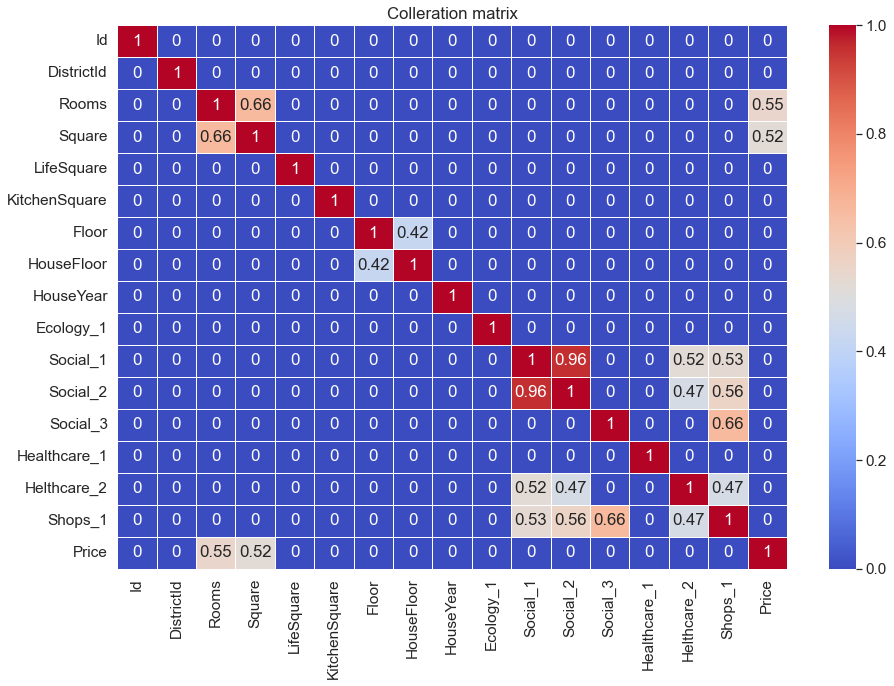

In [12]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.4] = 0

sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap='coolwarm')

plt.title('Colleration matrix')
plt.show()

### Разделение данных

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(columns='Price')

In [15]:
y = df['Price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=100)

### Обработка NaN

In [17]:
df['LifeSquare_nan'] = 0
df.loc[df['LifeSquare'].isna(), 'LifeSquare_nan'] = 1

In [18]:
df['Healthcare_1_nan'] = 0
df.loc[df['Healthcare_1'].isna(), 'Healthcare_1_nan'] = 1

In [19]:
medians = df[['LifeSquare', 'Healthcare_1']].median()
medians

LifeSquare       32.781261
Healthcare_1    900.000000
dtype: float32

In [20]:
df[['LifeSquare', 'Healthcare_1']] = df[['LifeSquare', 'Healthcare_1']].fillna(medians)

In [21]:
df['LifeSquare'].median()/df['Square'].median()

0.6242467

### Обработка выбросов

#### Количество комнат

In [301]:
rooms_max_value = np.quantile(df['Rooms'], q=0.99)
rooms_max_value

4.0

In [302]:
rooms_min_value = np.quantile(df['Rooms'], q=0.025)
rooms_min_value

1.0

In [303]:
condition = (df['Rooms'] > rooms_max_value) | (df['Rooms'] < rooms_min_value)
df['Rooms_outlier'] = 0
df.loc[condition, 'Rooms_outlier'] = 1
df.loc[condition, ['Rooms']] = df['Rooms'].median()
df['Rooms'].describe()

count    10000.000000
mean         1.883000
std          0.800234
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Rooms, dtype: float64

#### Площадь квартиры

In [304]:
square_max_value = np.quantile(df['Square'], q=0.997)
square_max_value

139.07381529235911

In [305]:
square_min_value = np.quantile(df['Square'], q=0.002)
square_min_value

19.925536556243898

In [306]:
condition = (df['Square'] > square_max_value) | (df['Square'] < square_min_value)
df[condition]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,Rooms_outlier
161,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,...,5212,6,900.0,3,2,B,438005.187500,0,1,0
328,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,...,1892,0,900.0,0,1,B,161379.062500,0,1,0
403,13434,13,2.0,183.382278,100.985504,15.0,2,6.0,1997,0.090799,...,19083,2,900.0,5,15,B,622888.812500,0,1,1
726,28,9,2.0,604.705994,32.781261,1.0,17,18.0,1977,0.161532,...,5648,1,30.0,2,4,B,187717.250000,1,0,0
730,14181,62,3.0,156.636581,153.685837,1.0,1,3.0,2005,0.072158,...,629,1,900.0,0,0,A,502523.562500,0,1,0
1401,9487,5,1.0,5.129221,5.549458,1.0,1,1.0,1977,0.150818,...,3433,4,2643.0,4,5,B,369472.406250,0,0,0
1449,11764,93,3.0,169.117203,32.781261,1.0,5,3.0,1977,0.004949,...,186,0,900.0,0,0,B,211325.578125,1,1,0
1606,3718,56,3.0,190.857681,107.376167,19.0,7,3.0,2007,0.000000,...,5067,4,900.0,2,6,B,338644.062500,0,1,0
1776,16568,27,4.0,200.334534,201.627365,25.0,1,2.0,2013,0.041116,...,14892,4,900.0,1,4,B,528560.500000,0,1,0
1906,5548,86,2.0,275.645294,233.949310,26.0,12,37.0,2011,0.161976,...,7010,5,4508.0,3,7,B,455264.875000,0,0,1


In [307]:
df['Square_outlier'] = 0
df.loc[condition, 'Square_outlier'] = 1

In [308]:
df.loc[condition, 'Square'] = df['Square'].median()
df['Square'].describe()

count    10000.000000
mean        55.925575
std         17.970566
min         19.927423
25%         41.810537
50%         52.513309
75%         65.805515
max        139.070297
Name: Square, dtype: float64

#### Жилая площадь

In [309]:
df['LifeSquare'].describe()

count    10000.000000
mean        36.266037
std         76.609985
min          0.370619
25%         25.527400
50%         32.781261
75%         41.427234
max       7480.592285
Name: LifeSquare, dtype: float64

In [310]:
lifesquare_max_value = np.quantile(df['LifeSquare'], q=0.975)
lifesquare_max_value

78.38594131469725

In [311]:
lifesquare_min_value = np.quantile(df['LifeSquare'], q=0.025)
lifesquare_min_value

15.14612386226654

In [312]:
condition = (df['LifeSquare'] < lifesquare_min_value) | (df['LifeSquare'] > lifesquare_max_value)
df[condition]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,Rooms_outlier,Square_outlier
26,8553,88,3.0,83.262527,4.769175,1.0,13,1.0,1977,0.127376,...,3,900.0,3,9,B,410883.906250,0,1,0,0
32,3876,100,4.0,104.769020,79.316650,8.0,4,8.0,1960,0.200147,...,8,770.0,2,0,B,600903.812500,0,0,0,0
64,3992,1,3.0,87.200623,87.730225,0.0,21,22.0,1977,0.007122,...,0,900.0,0,1,B,300180.375000,0,1,0,0
100,13343,74,2.0,79.937668,82.931595,1.0,8,21.0,1977,0.075779,...,3,900.0,0,2,B,226808.750000,0,1,0,0
119,5112,6,2.0,63.591740,0.795539,10.0,17,17.0,2014,0.243205,...,0,540.0,0,0,B,174742.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,16258,48,3.0,96.056786,98.152802,1.0,15,1.0,2017,0.041125,...,5,900.0,1,10,B,524365.562500,0,1,0,0
9965,6441,52,3.0,85.796883,85.305244,0.0,15,17.0,1977,0.371149,...,1,750.0,2,5,B,204462.984375,0,0,0,0
9982,10268,27,1.0,36.112392,1.855415,1.0,9,16.0,1977,0.211401,...,0,900.0,0,1,B,94881.695312,0,1,0,0
9990,10635,21,1.0,52.513309,11.419796,2.0,1,5.0,1967,0.194489,...,3,125.0,3,5,B,112411.218750,0,0,0,1


In [313]:
df['LifeSquare_outlier'] = 0
df.loc[condition, 'LifeSquare_outlier'] = 1

In [314]:
df.loc[condition, 'LifeSquare'] = (df['LifeSquare'] / df['Square']).median() * df['Square']
round(df['LifeSquare'], 0).describe()

count    10000.000000
mean        35.164299
std         12.172909
min         12.000000
25%         27.000000
50%         33.000000
75%         42.000000
max         85.000000
Name: LifeSquare, dtype: float64

#### Кухни

In [315]:
kitchen_max_value = np.quantile(df['KitchenSquare'], q=0.99)
kitchen_max_value

16.0

In [316]:
df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
30.0         2
43.0         2
41.0         2
112.0        2
25.0         2
51.0         2
37.0         2
58.0         2
32.0         2
21.0         1
73.0         1
75.0         1
36.0         1
27.0         1
63.0         1
1970.0       1
54.0         1
53.0         1
60.0         1
26.0         1
66.0         1
39.0         1
29.0         1
78.0         1
31.0         1
84.0         1
48.0         1
96.0         1
42.0         1
40.0         1
23.0         1
72.0         1
35.0         1
62.0         1
123.0        1
2014.0       1
Name: KitchenSquare, dtype: int64

In [317]:
kitchen_min_value = np.quantile(df['KitchenSquare'], q=0.025)
kitchen_min_value

0.0

In [318]:
condition = (df['KitchenSquare'] < kitchen_min_value) | (df['KitchenSquare'] > kitchen_max_value)
df[condition]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,Rooms_outlier,Square_outlier,LifeSquare_outlier
277,13559,79,1.0,96.838013,49.140961,22.0,19,24.0,2016,0.050756,...,145.0,0,1,B,348962.875000,0,0,0,0,0
286,2737,27,3.0,123.430069,75.673264,123.0,5,10.0,2015,0.017647,...,900.0,0,0,B,234194.843750,0,1,0,0,1
456,10546,62,1.0,46.013187,43.417042,43.0,4,17.0,2019,0.072158,...,900.0,0,0,A,113909.101562,0,1,0,0,0
511,8685,62,2.0,124.933289,76.594864,30.0,5,3.0,2017,0.072158,...,900.0,0,0,A,271919.875000,0,1,1,0,1
682,16593,52,2.0,64.859245,32.781261,62.0,15,17.0,1977,0.371149,...,750.0,2,5,B,185993.468750,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9743,14754,23,3.0,108.012566,56.801441,20.0,2,2.0,2017,0.014073,...,900.0,0,0,B,231464.515625,0,1,0,0,0
9746,7857,27,2.0,43.956043,26.948839,19.0,15,17.0,2006,0.075424,...,900.0,0,0,B,143688.078125,0,1,0,0,1
9810,16408,9,1.0,40.226906,37.849083,19.0,8,17.0,1993,0.161532,...,30.0,2,4,B,137595.609375,0,0,0,0,0
9860,3431,62,2.0,60.715427,40.720963,25.0,5,12.0,2012,0.386772,...,900.0,0,0,A,172366.015625,0,1,0,0,0


In [319]:
df['KitchenSquare_outlier'] = 0
df.loc[condition, 'KitchenSquare_outlier'] = 1

In [320]:
df.loc[condition, 'KitchenSquare'] = df['KitchenSquare'].median()
df['KitchenSquare'].describe()

count    10000.000000
mean         5.621400
std          3.779245
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max         16.000000
Name: KitchenSquare, dtype: float64

###### Жилая площадь > площади за вычетом кухни

In [321]:
df['NonresidentialSquare'] = df['Square'] - df['LifeSquare'] - df['KitchenSquare']
df['NonresidentialSquare'].describe()

count    10000.000000
mean        15.187964
std         12.987748
min        -39.317982
25%          8.406532
50%         12.518232
75%         19.624844
max        105.213730
Name: NonresidentialSquare, dtype: float64

In [322]:
condition = (df['LifeSquare'] >= (df['Square'] - df['KitchenSquare']))

In [323]:
df.loc[condition, 'Square_outlier'] = 1

In [324]:
df.loc[condition, 'Square'] = df['LifeSquare'] + df['KitchenSquare'] + df['NonresidentialSquare'].median()

In [325]:
df['NonresidentialSquare'] = df['Square'] - df['LifeSquare'] - df['KitchenSquare']
df['NonresidentialSquare'].describe()

count    10000.000000
mean        16.447800
std         11.742904
min          0.021393
25%          9.595763
50%         12.519500
75%         19.624844
max        105.213730
Name: NonresidentialSquare, dtype: float64

#### Этажность Дома

In [326]:
df['HouseFloor'].describe()

count    10000.000000
mean        12.609400
std          6.775974
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

In [327]:
housefloor_max_value = np.quantile(df['HouseFloor'], q=0.99)
housefloor_max_value

25.0

In [328]:
condition = (df['HouseFloor'] > housefloor_max_value) | (df['HouseFloor'] == 0)

In [329]:
df['HouseFloor_outlier'] = 0
df.loc[condition, 'HouseFloor_outlier'] = 1

In [330]:
df.loc[condition, 'HouseFloor'] = df['HouseFloor'].median()

#### Корректировка этажности дома относительно этажа квартиры

In [331]:
df['Floor_outlier'] = 0

In [332]:
df.loc[(df['HouseFloor'] < df['Floor']), 'Floor_outlier'] = 1

In [333]:
df['Floor_outlier'].value_counts()

0    8358
1    1642
Name: Floor_outlier, dtype: int64

In [334]:
df.loc[(df['HouseFloor'] < df['Floor']), 'Floor']  = df['HouseFloor']

### Возраст дома

In [335]:
df['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [336]:
house_year_min_value = np.quantile(df['HouseYear'], q=0.025)
house_year_min_value

1959.0

In [337]:
condition = ((df['HouseYear'] < house_year_min_value) | (df['HouseYear'] > 2021))
df[condition]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Price,LifeSquare_nan,Healthcare_1_nan,Rooms_outlier,Square_outlier,LifeSquare_outlier,KitchenSquare_outlier,NonresidentialSquare,HouseFloor_outlier,Floor_outlier
39,3736,167,2.0,56.712772,36.454063,7.0,5.0,5.0,1956,0.050272,...,299177.50000,0,0,0,0,0,0,13.258709,0,1
50,9629,124,3.0,78.275223,58.330875,6.0,9.0,9.0,1953,0.169091,...,387904.12500,0,1,0,0,0,0,13.944347,0,0
51,12774,157,2.0,62.747509,28.196814,8.0,5.0,10.0,1956,0.000000,...,555661.93750,0,0,0,0,0,0,26.550697,0,0
106,12997,4,3.0,75.128387,52.754246,8.0,9.0,9.0,1956,0.000078,...,574631.31250,0,0,0,0,0,0,14.374142,0,0
188,2574,159,2.0,43.439365,29.328888,6.0,5.0,8.0,1935,0.246624,...,288674.65625,0,1,0,0,0,0,8.110477,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,16522,33,3.0,64.460831,42.088741,6.0,1.0,5.0,1934,0.050272,...,287607.34375,0,0,0,0,0,0,16.372089,0,0
9927,15375,182,2.0,86.718262,65.200027,9.0,7.0,8.0,1918,0.015017,...,443270.81250,0,0,0,1,0,0,12.518234,0,0
9955,16557,65,2.0,57.309254,34.105385,8.0,11.0,11.0,1957,0.081943,...,403476.62500,0,1,0,0,0,0,15.203869,0,0
9961,7931,181,1.0,34.911270,18.433155,6.0,10.0,12.0,1955,0.000000,...,397528.75000,0,0,0,0,0,0,10.478115,0,0


In [338]:
df['HouseYear_outlier'] = 0
df.loc[condition, 'HouseYear_outlier'] = 1

In [339]:
df.loc[condition, 'HouseYear'] = df['HouseYear'].median()

In [340]:
df['HouseYear'].describe()

count    10000.000000
mean      1985.559800
std         17.426893
min       1959.000000
25%       1975.000000
50%       1977.000000
75%       2001.000000
max       2020.000000
Name: HouseYear, dtype: float64



### Экология

In [341]:
df['Ecology_2']

0       B
1       B
2       B
3       B
4       B
       ..
9995    B
9996    B
9997    B
9998    B
9999    B
Name: Ecology_2, Length: 10000, dtype: object

In [342]:
df.loc[(df['Ecology_2'] == 'A'), 'Ecology_2'] = 1

In [343]:
df.loc[(df['Ecology_2'] == 'B'), 'Ecology_2']  = 0

In [344]:
df['Ecology_2'] = df['Ecology_2'].astype(int)

In [345]:
df.loc[(df['Ecology_3'] == 'A'), 'Ecology_3'] = 1

In [346]:
df.loc[(df['Ecology_3'] == 'B'), 'Ecology_3']  = 0

In [347]:
df['Ecology_3'] = df['Ecology_3'].astype(int)
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,LifeSquare_nan,Healthcare_1_nan,Rooms_outlier,Square_outlier,LifeSquare_outlier,KitchenSquare_outlier,NonresidentialSquare,HouseFloor_outlier,Floor_outlier,HouseYear_outlier
0,11809,27,3.0,115.027313,32.781261,10.0,4.0,10.0,2014,0.075424,...,1,1,0,0,0,0,72.246048,0,0,0
1,3013,22,1.0,39.832523,23.169222,8.0,7.0,8.0,1966,0.118537,...,0,0,0,0,0,0,8.663301,0,0,0
2,8215,1,3.0,78.342216,47.671970,10.0,2.0,17.0,1988,0.025609,...,0,0,0,0,0,0,20.670246,0,0,0
3,2352,1,1.0,40.409908,32.781261,1.0,10.0,22.0,1977,0.007122,...,1,1,0,0,0,0,6.628647,0,0,0
4,13866,94,2.0,64.285065,38.562515,9.0,16.0,16.0,1972,0.282798,...,0,1,0,0,0,0,16.722549,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090729,33.272625,6.0,3.0,12.0,1981,0.300323,...,0,1,0,0,0,0,9.818104,0,0,0
9996,16265,27,2.0,64.307686,37.038422,9.0,13.0,13.0,1977,0.072158,...,0,1,0,0,0,0,18.269264,1,0,0
9997,2795,178,1.0,29.648056,16.555363,5.0,3.0,5.0,1977,0.460556,...,0,1,0,0,0,0,8.092693,0,0,1
9998,14561,21,1.0,32.330292,22.326870,5.0,3.0,9.0,1969,0.194489,...,0,0,0,0,0,0,5.003422,0,0,0


### Магазины

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     10000 non-null  int16  
 1   DistrictId             10000 non-null  int16  
 2   Rooms                  10000 non-null  float32
 3   Square                 10000 non-null  float32
 4   LifeSquare             10000 non-null  float32
 5   KitchenSquare          10000 non-null  float32
 6   Floor                  10000 non-null  float32
 7   HouseFloor             10000 non-null  float32
 8   HouseYear              10000 non-null  int32  
 9   Ecology_1              10000 non-null  float32
 10  Ecology_2              10000 non-null  int32  
 11  Ecology_3              10000 non-null  int32  
 12  Social_1               10000 non-null  int8   
 13  Social_2               10000 non-null  int16  
 14  Social_3               10000 non-null  int16  
 15  Hea

In [349]:
df.loc[df['Shops_2'] == 'A', 'Shops_2'] = 1
df.loc[df['Shops_2'] == 'B', 'Shops_2'] = 0

In [350]:
df['Shops_2'] = df['Shops_2'].astype(int)

In [351]:
df['Shops_2'].dtype

dtype('int32')

# Исключение ненужных столбцов

In [352]:
df.drop(columns=['Id'], inplace=True)

In [353]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,LifeSquare_nan,Healthcare_1_nan,Rooms_outlier,Square_outlier,LifeSquare_outlier,KitchenSquare_outlier,NonresidentialSquare,HouseFloor_outlier,Floor_outlier,HouseYear_outlier
0,27,3.0,115.027313,32.781261,10.0,4.0,10.0,2014,0.075424,0,...,1,1,0,0,0,0,72.246048,0,0,0
1,22,1.0,39.832523,23.169222,8.0,7.0,8.0,1966,0.118537,0,...,0,0,0,0,0,0,8.663301,0,0,0
2,1,3.0,78.342216,47.671970,10.0,2.0,17.0,1988,0.025609,0,...,0,0,0,0,0,0,20.670246,0,0,0
3,1,1.0,40.409908,32.781261,1.0,10.0,22.0,1977,0.007122,0,...,1,1,0,0,0,0,6.628647,0,0,0
4,94,2.0,64.285065,38.562515,9.0,16.0,16.0,1972,0.282798,0,...,0,1,0,0,0,0,16.722549,0,0,0





# Добавление новых признаков

#### Слияние Social_1 и Social_2

In [354]:
df['Social_1'].describe()

count    10000.000000
mean        24.687000
std         17.532614
min          0.000000
25%          6.000000
50%         25.000000
75%         36.000000
max         74.000000
Name: Social_1, dtype: float64

In [90]:
df['Social_2'].value_counts().sum()

10000

In [92]:
(df['Social_2'] - df['Social_2'].median())/ df['Social_2'].value_counts().sum()

0      -0.2188
1       0.0922
2      -0.0024
3      -0.5021
4       0.3382
         ...  
9995    0.5026
9996   -0.4656
9997   -0.0899
9998    0.2719
9999    0.3144
Name: Social_2, Length: 10000, dtype: float64

In [87]:
df['Social_2'].std()

4006.799802547041

In [356]:
df['Social_1_2'] = (df['Social_2'] - df['Social_2'].mean())/ df['Social_2'].value_counts().sum() + (df['Social_1'] - df['Social_1'].mean())/ df['Social_1'].value_counts().sum()

In [357]:
df.drop(['Social_1', 'Social_2'], axis=1, inplace=True)

In [358]:
df['Social_1_2']

0        26.485
1        61.035
2        59.305
3         2.320
4        76.335
         ...   
9995    103.555
9996      5.145
9997     41.930
9998     87.020
9999     85.145
Name: Social_1_2, Length: 10000, dtype: float64

#### Категоризация этажей квартир

In [359]:
df['LifeSquare/Square'] = (df['LifeSquare'] / df['Square'])
df['LifeSquare/Square'].median()

0.6130861

In [360]:
df['HouseFloor/Floor'] = ( df['HouseFloor'] / df['Floor'])
df['HouseFloor/Floor'].describe()

count    10000.000000
mean         2.163558
std          1.892261
min          1.000000
25%          1.000000
50%          1.500000
75%          2.428571
max         20.000000
Name: HouseFloor/Floor, dtype: float64

In [361]:
def floor_to_cat(X):
    
    X['floor_cat'] = 0
    
    X.loc[(X['HouseFloor/Floor'] == 1) & (X['Floor'] == 1), 'floor_cat'] = 1
    X.loc[(X['HouseFloor/Floor'] == 1) & (X['Floor'] == 2), 'floor_cat'] = 2
    X.loc[(X['HouseFloor/Floor'] >= 2.5) & (X['Floor'] > 2), 'floor_cat'] = 3
    X.loc[(X['HouseFloor/Floor'] >= 2) & (X['HouseFloor/Floor'] < 2.5), 'floor_cat'] = 4
    X.loc[(X['HouseFloor/Floor'] >= 2.5) & (X['Floor'] <= 2), 'floor_cat'] = 5
    X.loc[(X['HouseFloor/Floor'] >= 1.5) & (X['HouseFloor/Floor'] < 2), 'floor_cat'] = 6
    X.loc[(X['HouseFloor/Floor'] > 1) & (X['HouseFloor/Floor'] < 1.5), 'floor_cat'] = 7
    X.loc[(X['HouseFloor/Floor'] == 1) & (X['Floor'] > 2), 'floor_cat'] = 8
    
    return X

In [362]:
df = floor_to_cat(df)
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,LifeSquare_outlier,KitchenSquare_outlier,NonresidentialSquare,HouseFloor_outlier,Floor_outlier,HouseYear_outlier,Social_1_2,LifeSquare/Square,HouseFloor/Floor,floor_cat
0,27,3.0,115.027313,32.781261,10.0,4.0,10.0,2014,0.075424,0,...,0,0,72.246048,0,0,0,26.485,0.284987,2.500000,3
1,22,1.0,39.832523,23.169222,8.0,7.0,8.0,1966,0.118537,0,...,0,0,8.663301,0,0,0,61.035,0.581666,1.142857,7
2,1,3.0,78.342216,47.671970,10.0,2.0,17.0,1988,0.025609,0,...,0,0,20.670246,0,0,0,59.305,0.608509,8.500000,5
3,1,1.0,40.409908,32.781261,1.0,10.0,22.0,1977,0.007122,0,...,0,0,6.628647,0,0,0,2.320,0.811218,2.200000,4
4,94,2.0,64.285065,38.562515,9.0,16.0,16.0,1972,0.282798,0,...,0,0,16.722549,0,0,0,76.335,0.599867,1.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090729,33.272625,6.0,3.0,12.0,1981,0.300323,0,...,0,0,9.818104,0,0,0,103.555,0.677778,4.000000,3
9996,27,2.0,64.307686,37.038422,9.0,13.0,13.0,1977,0.072158,0,...,0,0,18.269264,1,0,0,5.145,0.575956,1.000000,8
9997,178,1.0,29.648056,16.555363,5.0,3.0,5.0,1977,0.460556,0,...,0,0,8.092693,0,0,1,41.930,0.558396,1.666667,6
9998,21,1.0,32.330292,22.326870,5.0,3.0,9.0,1969,0.194489,0,...,0,0,5.003422,0,0,0,87.020,0.690587,3.000000,3


In [363]:
def cottage_to_binary_cat(X):
    
    X['cottage'] = 0
    X.loc[X['HouseFloor'] == 1, 'cottage'] = 1
    
    return X

In [364]:
df = cottage_to_binary_cat(df)
df.sample(5)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,KitchenSquare_outlier,NonresidentialSquare,HouseFloor_outlier,Floor_outlier,HouseYear_outlier,Social_1_2,LifeSquare/Square,HouseFloor/Floor,floor_cat,cottage
9738,75,2.0,43.922737,28.338528,5.0,5.0,5.0,1963,0.307467,0,...,0,10.584209,0,0,0,55.240,0.645190,1.000000,8,0
3342,55,3.0,81.192886,49.736149,10.0,6.0,14.0,1996,0.041365,0,...,0,21.456738,0,0,0,58.845,0.612568,2.333333,4,0
1671,23,1.0,37.456863,32.781261,1.0,7.0,17.0,1977,0.075779,0,...,0,3.675602,0,0,0,13.185,0.875174,2.428571,4,0
6982,62,1.0,39.972874,22.556999,10.0,10.0,16.0,1980,0.002212,0,...,0,7.415874,0,0,0,77.070,0.564308,1.600000,6,0
4992,70,3.0,69.900009,48.334675,5.0,9.0,9.0,1976,0.002212,0,...,0,16.565334,0,1,0,77.070,0.691483,1.000000,8,0


#### Категоризация возраста дома

In [365]:
df['house_age'] = 2021 - df['HouseYear']

In [366]:
df.sample(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,NonresidentialSquare,HouseFloor_outlier,Floor_outlier,HouseYear_outlier,Social_1_2,LifeSquare/Square,HouseFloor/Floor,floor_cat,cottage,house_age
6344,23,1.0,54.933456,41.415222,1.0,12.0,17.0,1977,0.075779,0,...,12.518234,0,0,0,13.185,0.753916,1.416667,7,0,44
5331,128,3.0,79.151337,47.035141,13.0,17.0,17.0,2005,0.000000,0,...,19.116196,0,0,0,50.990,0.594243,1.000000,8,0,16
1718,27,2.0,72.655083,32.781261,0.0,2.0,13.0,1977,0.072158,0,...,39.873821,1,0,0,5.145,0.451190,6.500000,5,0,44
3203,96,1.0,42.459721,18.786261,7.0,4.0,15.0,2011,0.041116,0,...,16.673460,0,0,0,127.460,0.442449,3.750000,3,0,10
1852,39,3.0,58.880703,44.920670,5.0,9.0,9.0,1974,0.428826,0,...,8.960033,0,1,0,50.055,0.762910,1.000000,8,0,47
3001,46,4.0,102.929695,64.606834,10.0,21.0,22.0,1985,0.188784,0,...,28.322861,0,0,0,61.685,0.627679,1.047619,7,0,36
9531,58,2.0,78.181381,72.275177,0.0,4.0,9.0,1977,0.437885,0,...,5.906204,0,0,0,51.675,0.924455,2.250000,4,0,44
1856,28,1.0,36.312897,23.310356,9.0,2.0,10.0,1972,0.118537,0,...,4.002541,0,0,0,61.035,0.641931,5.000000,5,0,49
2796,23,2.0,66.248787,32.781261,1.0,6.0,17.0,1977,0.075779,0,...,32.467525,0,0,0,13.185,0.494821,2.833333,3,0,44
7287,59,3.0,76.881165,49.025822,10.0,17.0,17.0,1985,0.019509,0,...,17.855343,0,1,0,75.435,0.637683,1.000000,8,0,36


In [367]:
def age_to_cat(X):
    
    X['age_cat'] = 0
    
    X.loc[df['house_age'] <= 5, 'age_cat'] = 1
    X.loc[(df['house_age'] > 5) & (df['house_age'] <= 10), 'age_cat'] = 2
    X.loc[(df['house_age'] > 10) & (df['house_age'] <= 15), 'age_cat'] = 3
    X.loc[(df['house_age'] > 15) & (df['house_age'] <= 25), 'age_cat'] = 4
    X.loc[(df['house_age'] > 25) & (df['house_age'] <= 40), 'age_cat'] = 5
    X.loc[(df['house_age'] > 40) & (df['house_age'] <= 45), 'age_cat'] = 6
    X.loc[(df['house_age'] > 45) & (df['house_age'] <= 55), 'age_cat'] = 7
    X.loc[(df['house_age'] > 55), 'age_cat'] = 8
    
    return X

In [368]:
df = age_to_cat(df)
df.head(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,HouseFloor_outlier,Floor_outlier,HouseYear_outlier,Social_1_2,LifeSquare/Square,HouseFloor/Floor,floor_cat,cottage,house_age,age_cat
0,27,3.0,115.027313,32.781261,10.0,4.0,10.0,2014,0.075424,0,...,0,0,0,26.485,0.284987,2.500000,3,0,7,2
1,22,1.0,39.832523,23.169222,8.0,7.0,8.0,1966,0.118537,0,...,0,0,0,61.035,0.581666,1.142857,7,0,55,7
2,1,3.0,78.342216,47.671970,10.0,2.0,17.0,1988,0.025609,0,...,0,0,0,59.305,0.608509,8.500000,5,0,33,5
3,1,1.0,40.409908,32.781261,1.0,10.0,22.0,1977,0.007122,0,...,0,0,0,2.320,0.811218,2.200000,4,0,44,6
4,94,2.0,64.285065,38.562515,9.0,16.0,16.0,1972,0.282798,0,...,0,0,0,76.335,0.599867,1.000000,8,0,49,7
5,99,3.0,62.528465,47.103832,6.0,9.0,9.0,1972,0.012339,0,...,0,0,0,63.880,0.753318,1.000000,8,0,49,7
6,44,1.0,33.938751,21.772930,9.0,1.0,12.0,1968,0.232205,0,...,0,0,0,48.300,0.641536,12.000000,5,0,53,7
7,59,2.0,50.391815,32.893257,8.0,8.0,17.0,1986,0.019509,0,...,0,0,0,75.435,0.652750,2.125000,4,0,35,5
8,1,1.0,46.887894,44.628132,1.0,12.0,20.0,1977,0.007122,0,...,0,0,0,2.320,0.951805,1.666667,6,0,44,6
9,6,3.0,79.867477,75.085129,1.0,3.0,17.0,2014,0.243205,0,...,0,0,0,12.820,0.940121,5.666667,3,0,7,2


# Уменьшение количества занимаемой памяти базы

In [369]:
reduce_mem_usage(df)

Memory usage of dataframe is 1.70 MB
Memory usage after optimization is: 0.72 MB
Decreased by 57.299250%


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,HouseFloor_outlier,Floor_outlier,HouseYear_outlier,Social_1_2,LifeSquare/Square,HouseFloor/Floor,floor_cat,cottage,house_age,age_cat
0,27,3.0,115.027313,32.781261,10.0,4.0,10.0,2014,0.075424,0,...,0,0,0,26.485001,0.284987,2.500000,3,0,7,2
1,22,1.0,39.832523,23.169222,8.0,7.0,8.0,1966,0.118537,0,...,0,0,0,61.035000,0.581666,1.142857,7,0,55,7
2,1,3.0,78.342216,47.671970,10.0,2.0,17.0,1988,0.025609,0,...,0,0,0,59.305000,0.608509,8.500000,5,0,33,5
3,1,1.0,40.409908,32.781261,1.0,10.0,22.0,1977,0.007122,0,...,0,0,0,2.320000,0.811218,2.200000,4,0,44,6
4,94,2.0,64.285065,38.562515,9.0,16.0,16.0,1972,0.282798,0,...,0,0,0,76.334999,0.599867,1.000000,8,0,49,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090729,33.272625,6.0,3.0,12.0,1981,0.300323,0,...,0,0,0,103.555000,0.677778,4.000000,3,0,40,5
9996,27,2.0,64.307686,37.038422,9.0,13.0,13.0,1977,0.072158,0,...,1,0,0,5.145000,0.575956,1.000000,8,0,44,6
9997,178,1.0,29.648056,16.555363,5.0,3.0,5.0,1977,0.460556,0,...,0,0,1,41.930000,0.558396,1.666667,6,0,44,6
9998,21,1.0,32.330292,22.326870,5.0,3.0,9.0,1969,0.194489,0,...,0,0,0,87.019997,0.690587,3.000000,3,0,52,7


### Анализ признаков

In [370]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('Price', axis=1, inplace=True)

In [371]:
df_num_features.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Healthcare_1,NonresidentialSquare,Social_1_2,LifeSquare/Square,HouseFloor/Floor
0,3.0,115.027313,32.781261,10.0,4.0,10.0,0.075424,900.0,72.246048,26.485001,0.284987,2.500000
1,1.0,39.832523,23.169222,8.0,7.0,8.0,0.118537,1183.0,8.663301,61.035000,0.581666,1.142857
2,3.0,78.342216,47.671970,10.0,2.0,17.0,0.025609,240.0,20.670246,59.305000,0.608509,8.500000
3,1.0,40.409908,32.781261,1.0,10.0,22.0,0.007122,900.0,6.628647,2.320000,0.811218,2.200000
4,2.0,64.285065,38.562515,9.0,16.0,16.0,0.282798,900.0,16.722549,76.334999,0.599867,1.000000


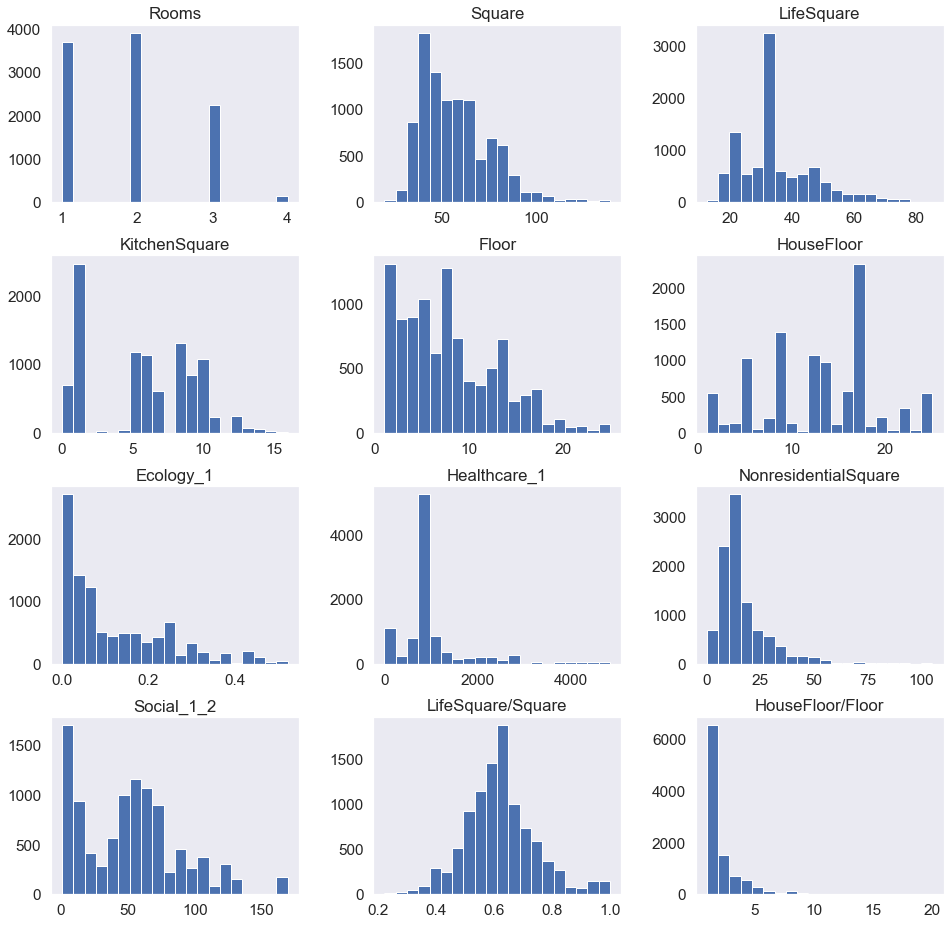

In [372]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False)
plt.show()

In [373]:
df['LifeSquare/Square'].describe()

count    10000.000000
mean         0.620280
std          0.121372
min          0.222840
25%          0.546140
50%          0.613086
75%          0.683653
max          0.999712
Name: LifeSquare/Square, dtype: float64

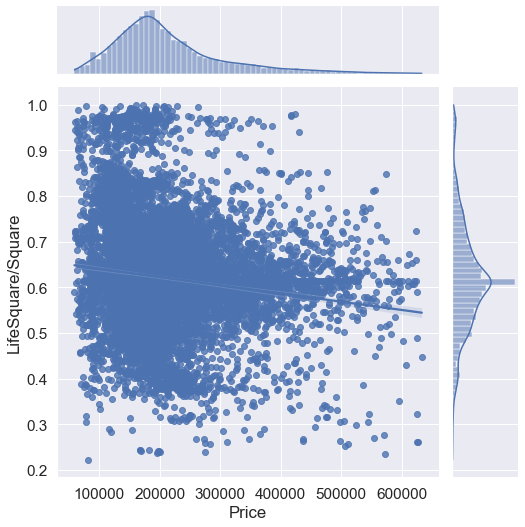

In [388]:
count_rooms = sns.jointplot(df['Price'], df['LifeSquare/Square'], kind='reg')
count_rooms.fig.set_figwidth(8)
count_rooms.fig.set_figheight(8)

plt.show()

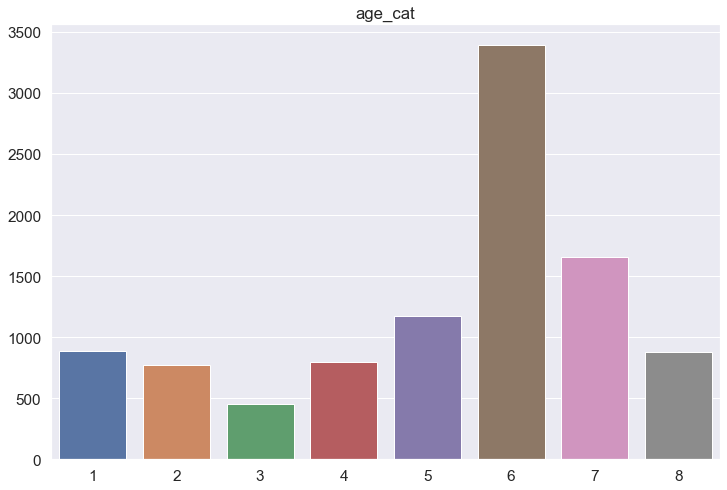

In [375]:
counts = df['age_cat'].value_counts()

plt.figure(figsize=(12, 8))
plt.title('age_cat')
sns.barplot(counts.index, counts.values)

plt.show()

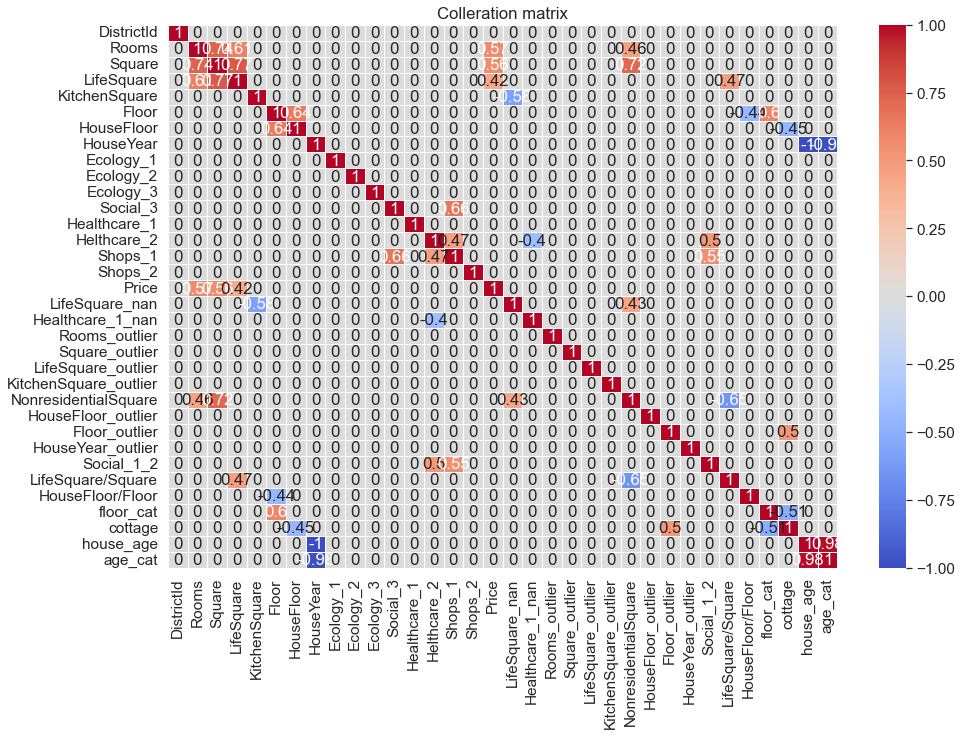

In [376]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.4] = 0

sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap='coolwarm')

plt.title('Colleration matrix')
plt.show()

In [377]:
#df.drop('HouseYear', axis=1, inplace=True)

In [378]:
from sklearn.model_selection import train_test_split

In [379]:
y = pd.DataFrame(df['Price'], columns=['Price'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   10000 non-null  float32
dtypes: float32(1)
memory usage: 39.2 KB


In [380]:
x = df.drop('Price', axis=1)

In [381]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=42)

In [382]:
x_train.to_pickle('x_train.pkl')
y_train.to_pickle('y_train.pkl')

x_valid.to_pickle('x_valid.pkl')
y_valid.to_pickle('y_valid.pkl')